### **TP Final**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data = datasets.cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = data

# Normalizo los valores de los píxeles para que estén entre 0 y 1
train_images, test_images = train_images / 255.0, test_images / 255.0

split = train_test_split(train_images, train_labels, train_size = 0.8,
                         random_state = 0)

train_images, val_images, train_labels, val_labels = split

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Toma el nombre del ejercicio y el valor de p, y devuelve el modelo con las
# capas requeridas
def modelo(ej, p = 0):
  model = models.Sequential()

  if ej == '3':
    img_height = 32
    img_width = 32
    data_augmentation = tf.keras.Sequential(
        [
          layers.RandomFlip('horizontal',
                            input_shape = (img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
        ]
    )
    model.add(data_augmentation)

    # Sin input shape para ejercicio 3
    model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
  else:
    # Primera capa para el resto de ejercicios, con input_shape
    model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu',
                            input_shape = (32, 32, 3)))

  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
  model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
  model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))

  if ej != '1':
    model.add(layers.Dropout(p))

  model.add(layers.Flatten())
  model.add(layers.Dense(64))

  if ej == '2b' or '3':
    model.add(layers.Dropout(p))

  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  model.compile(optimizer = 'adam',
                loss = losses.SparseCategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])

  return model

**Ejercicio 1**

Epoch 1/10
1250/1250 [==============================] - 126s 100ms/step - loss: 1.5511 - accuracy: 0.4312 - val_loss: 1.2415 - val_accuracy: 0.5543
Epoch 2/10
1250/1250 [==============================] - 119s 95ms/step - loss: 1.1285 - accuracy: 0.5975 - val_loss: 1.0754 - val_accuracy: 0.6141
Epoch 3/10
1250/1250 [==============================] - 118s 95ms/step - loss: 0.9552 - accuracy: 0.6637 - val_loss: 0.9763 - val_accuracy: 0.6610
Epoch 4/10
1250/1250 [==============================] - 117s 94ms/step - loss: 0.8419 - accuracy: 0.7012 - val_loss: 0.9423 - val_accuracy: 0.6758
Epoch 5/10
1250/1250 [==============================] - 124s 99ms/step - loss: 0.7507 - accuracy: 0.7384 - val_loss: 0.8719 - val_accuracy: 0.6972
Epoch 6/10
1250/1250 [==============================] - 117s 94ms/step - loss: 0.6787 - accuracy: 0.7588 - val_loss: 0.8681 - val_accuracy: 0.7011
Epoch 7/10
1250/1250 [==============================] - 118s 94ms/step - loss: 0.6107 - accuracy: 0.7834 - val_loss: 

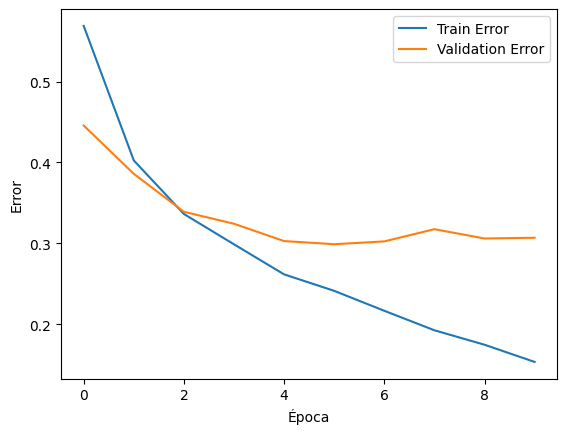

In [ ]:
# Primer modelo
model = modelo('1')
history = model.fit(train_images, train_labels, epochs = 10,
                    validation_data = (val_images, val_labels))

# Resto 1 a los valores de accuracy para obtener los errores de entrenamiento y
# de validación
e_train = np.subtract(1, history.history['accuracy'])
e_val = np.subtract(1, history.history['val_accuracy'])

# Grafico
plt.plot(e_train, label = 'Train Error')
plt.plot(e_val, label = 'Validation Error')
plt.xlabel('Época')
plt.ylabel('Error')
plt.legend(loc = 'upper right')

# Resto 1 al valor de accuracy para obtener el error de test, y lo imprimo
_, test_acc = model.evaluate(test_images,  test_labels, verbose = 2)
e_test = 1 - test_acc

print('Test Error: ' + str(e_test))

Se obtuvo un error de test de aproximadamente 0.31, con un error de validación cercano a éste en las últimas épocas.

En la gráfica se observa sobreajuste, lo cual parece ir empeorando en cada eṕoca, donde el error de entrenamiento resultó cercano a 0.1 en la última.

**Ejercicio 2**

In [ ]:
# Agrego una capa Dropout luego de la última capa convolucional, con p = 0.2
model = modelo('2a', 0.2)
history1 = model.fit(train_images, train_labels, epochs = 20,
                     validation_data = (val_images, val_labels))

_, test_acc1 = model.evaluate(test_images,  test_labels, verbose = 2)

Epoch 1/20
1250/1250 [==============================] - 224s 176ms/step - loss: 1.6089 - accuracy: 0.4034 - val_loss: 1.3454 - val_accuracy: 0.5166
Epoch 2/20
1250/1250 [==============================] - 216s 173ms/step - loss: 1.2249 - accuracy: 0.5600 - val_loss: 1.0600 - val_accuracy: 0.6257
Epoch 3/20
1250/1250 [==============================] - 200s 160ms/step - loss: 1.0405 - accuracy: 0.6317 - val_loss: 0.9720 - val_accuracy: 0.6519
Epoch 4/20
1250/1250 [==============================] - 207s 166ms/step - loss: 0.9283 - accuracy: 0.6736 - val_loss: 0.8727 - val_accuracy: 0.6945
Epoch 5/20
1250/1250 [==============================] - 196s 157ms/step - loss: 0.8479 - accuracy: 0.7041 - val_loss: 0.8990 - val_accuracy: 0.6853
Epoch 6/20
1250/1250 [==============================] - 208s 166ms/step - loss: 0.7847 - accuracy: 0.7223 - val_loss: 0.8596 - val_accuracy: 0.6995
Epoch 7/20
1250/1250 [==============================] - 206s 165ms/step - loss: 0.7261 - accuracy: 0.7460 - val_

In [ ]:
# Agrego una capa Dropout luego de la última capa convolucional, con p = 0.5
model = modelo('2a', 0.5)
history2 = model.fit(train_images, train_labels, epochs = 20,
                     validation_data = (val_images, val_labels))

_, test_acc2 = model.evaluate(test_images,  test_labels, verbose = 2)

Epoch 1/20
1250/1250 [==============================] - 226s 179ms/step - loss: 1.7049 - accuracy: 0.3623 - val_loss: 1.3507 - val_accuracy: 0.4989
Epoch 2/20
1250/1250 [==============================] - 219s 175ms/step - loss: 1.3543 - accuracy: 0.5069 - val_loss: 1.1743 - val_accuracy: 0.5723
Epoch 3/20
1250/1250 [==============================] - 216s 173ms/step - loss: 1.1938 - accuracy: 0.5727 - val_loss: 1.0753 - val_accuracy: 0.6168
Epoch 4/20
1250/1250 [==============================] - 217s 173ms/step - loss: 1.0921 - accuracy: 0.6145 - val_loss: 1.0001 - val_accuracy: 0.6454
Epoch 5/20
1250/1250 [==============================] - 206s 165ms/step - loss: 1.0197 - accuracy: 0.6419 - val_loss: 0.9126 - val_accuracy: 0.6800
Epoch 6/20
1250/1250 [==============================] - 216s 173ms/step - loss: 0.9581 - accuracy: 0.6644 - val_loss: 0.9019 - val_accuracy: 0.6899
Epoch 7/20
1250/1250 [==============================] - 215s 172ms/step - loss: 0.9185 - accuracy: 0.6799 - val_

In [ ]:
# Agrego una capa Dropout luego de la última capa convolucional y otra luego de
# la primer capa densa, con p = 0.2
model = modelo('2b', 0.2)
history3 = model.fit(train_images, train_labels, epochs = 20,
                     validation_data = (val_images, val_labels))

_, test_acc3 = model.evaluate(test_images,  test_labels, verbose = 2)

Epoch 1/20
1250/1250 [==============================] - 204s 161ms/step - loss: 1.5833 - accuracy: 0.4187 - val_loss: 1.2842 - val_accuracy: 0.5343
Epoch 2/20
1250/1250 [==============================] - 197s 157ms/step - loss: 1.1893 - accuracy: 0.5753 - val_loss: 1.0912 - val_accuracy: 0.6166
Epoch 3/20
1250/1250 [==============================] - 199s 159ms/step - loss: 1.0143 - accuracy: 0.6440 - val_loss: 0.9671 - val_accuracy: 0.6587
Epoch 4/20
1250/1250 [==============================] - 203s 162ms/step - loss: 0.8949 - accuracy: 0.6851 - val_loss: 0.9155 - val_accuracy: 0.6756
Epoch 5/20
1250/1250 [==============================] - 213s 170ms/step - loss: 0.8293 - accuracy: 0.7083 - val_loss: 0.9094 - val_accuracy: 0.6875
Epoch 6/20
1250/1250 [==============================] - 204s 163ms/step - loss: 0.7542 - accuracy: 0.7360 - val_loss: 0.8303 - val_accuracy: 0.7128
Epoch 7/20
1250/1250 [==============================] - 211s 169ms/step - loss: 0.6991 - accuracy: 0.7534 - val_

In [ ]:
# Agrego una capa Dropout luego de la última capa convolucional y otra luego de
# la primer capa densa, con p = 0.5
model = modelo('2b', 0.5)
history4 = model.fit(train_images, train_labels, epochs = 20,
                     validation_data = (val_images, val_labels))

_, test_acc4 = model.evaluate(test_images,  test_labels, verbose = 2)

Epoch 1/20
1250/1250 [==============================] - 211s 168ms/step - loss: 1.6868 - accuracy: 0.3745 - val_loss: 1.3376 - val_accuracy: 0.5056
Epoch 2/20
1250/1250 [==============================] - 206s 165ms/step - loss: 1.3584 - accuracy: 0.5045 - val_loss: 1.2010 - val_accuracy: 0.5493
Epoch 3/20
1250/1250 [==============================] - 199s 159ms/step - loss: 1.2204 - accuracy: 0.5609 - val_loss: 1.0945 - val_accuracy: 0.6143
Epoch 4/20
1250/1250 [==============================] - 207s 165ms/step - loss: 1.1257 - accuracy: 0.5998 - val_loss: 0.9973 - val_accuracy: 0.6473
Epoch 5/20
1250/1250 [==============================] - 207s 165ms/step - loss: 1.0529 - accuracy: 0.6291 - val_loss: 0.9449 - val_accuracy: 0.6622
Epoch 6/20
1250/1250 [==============================] - 214s 172ms/step - loss: 0.9898 - accuracy: 0.6520 - val_loss: 0.9286 - val_accuracy: 0.6728
Epoch 7/20
1250/1250 [==============================] - 201s 161ms/step - loss: 0.9382 - accuracy: 0.6710 - val_

Test Error 1 Dropout p = 0.2: 0.2742999792098999
Test Error 1 Dropout p = 0.5: 0.263700008392334
Test Error 2 Dropout p = 0.2: 0.28710001707077026
Test Error 2 Dropout p = 0.5: 0.27810001373291016


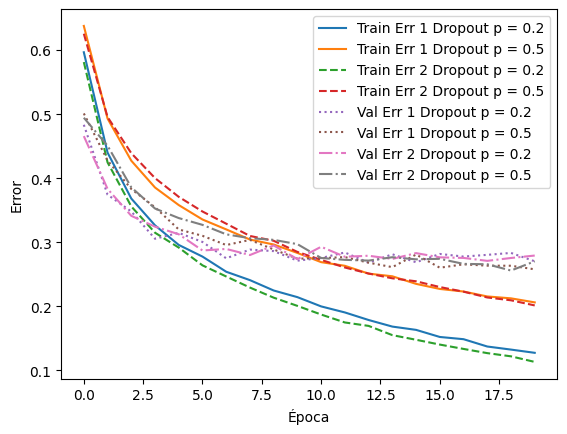

In [ ]:
# Resto 1 a los valores de accuracy para obtener los errores de entrenamiento
e_train_1 = np.subtract(1, history1.history['accuracy'])
e_train_2 = np.subtract(1, history2.history['accuracy'])
e_train_3 = np.subtract(1, history3.history['accuracy'])
e_train_4 = np.subtract(1, history4.history['accuracy'])

# Resto 1 a los valores de accuracy para obtener los errores de validación
e_val_1 = np.subtract(1, history1.history['val_accuracy'])
e_val_2 = np.subtract(1, history2.history['val_accuracy'])
e_val_3 = np.subtract(1, history3.history['val_accuracy'])
e_val_4 = np.subtract(1, history4.history['val_accuracy'])

# Resto 1 a los valores de accuracy para obtener los errores de test
e_test_1 = 1 - test_acc1
e_test_2 = 1 - test_acc2
e_test_3 = 1 - test_acc3
e_test_4 = 1 - test_acc4

# Grafico
plt.plot(e_train_1, label = 'Train Err 1 Dropout p = 0.2', linestyle = '-')
plt.plot(e_train_2, label = 'Train Err 1 Dropout p = 0.5', linestyle = '-')
plt.plot(e_train_3, label = 'Train Err 2 Dropout p = 0.2', linestyle = '--')
plt.plot(e_train_4, label = 'Train Err 2 Dropout p = 0.5', linestyle = '--')
plt.plot(e_val_1, label = 'Val Err 1 Dropout p = 0.2', linestyle = ':')
plt.plot(e_val_2, label = 'Val Err 1 Dropout p = 0.5', linestyle = ':')
plt.plot(e_val_3, label = 'Val Err 2 Dropout p = 0.2', linestyle = '-.')
plt.plot(e_val_4, label = 'Val Err 2 Dropout p = 0.5', linestyle = '-.')
plt.xlabel('Época')
plt.ylabel('Error')
plt.legend(loc = 'upper right')

# Imprimo los errores de test
print('Test Error 1 Dropout p = 0.2: ' + str(e_test_1))
print('Test Error 1 Dropout p = 0.5: ' + str(e_test_2))
print('Test Error 2 Dropout p = 0.2: ' + str(e_test_3))
print('Test Error 2 Dropout p = 0.5: ' + str(e_test_4))

# Tomo el p óptimo a partir del que dio menor error de validación
min_e_val = min(e_val_3[19], e_val_4[19])
if min_e_val == e_val_3[19]:
  best_p = 0.2
else:
  best_p = 0.5

Al agregar las capas de dropout, se obtuvieron errores ligeramente menores a los del ejercicio anterior. Lo que sí mejoró considerablemente es el overfitting para *p = 0.5*, pero para *p = 0.2* es muy similar al que se obtuvo antes de agregar las capas de dropout.

Además, como el error de validación resultó menor para *p = 0.5*, elijo este valor para el próximo ejercicio.

Por otro lado, respecto a agregar 1 o 2 capas de dropout, usando el mismo *p* se obtuvieron errores prácticamente iguales.

**Ejercicio 3**

Epoch 1/20
1250/1250 [==============================] - 126s 100ms/step - loss: 1.7990 - accuracy: 0.3337 - val_loss: 1.4415 - val_accuracy: 0.4681
Epoch 2/20
1250/1250 [==============================] - 128s 102ms/step - loss: 1.5358 - accuracy: 0.4405 - val_loss: 1.3180 - val_accuracy: 0.5102
Epoch 3/20
1250/1250 [==============================] - 124s 100ms/step - loss: 1.4445 - accuracy: 0.4772 - val_loss: 1.2660 - val_accuracy: 0.5484
Epoch 4/20
1250/1250 [==============================] - 125s 100ms/step - loss: 1.3820 - accuracy: 0.5033 - val_loss: 1.2381 - val_accuracy: 0.5688
Epoch 5/20
1250/1250 [==============================] - 123s 98ms/step - loss: 1.3343 - accuracy: 0.5252 - val_loss: 1.1324 - val_accuracy: 0.6010
Epoch 6/20
1250/1250 [==============================] - 124s 99ms/step - loss: 1.2839 - accuracy: 0.5453 - val_loss: 1.0792 - val_accuracy: 0.6280
Epoch 7/20
1250/1250 [==============================] - 125s 100ms/step - loss: 1.2565 - accuracy: 0.5562 - val_lo

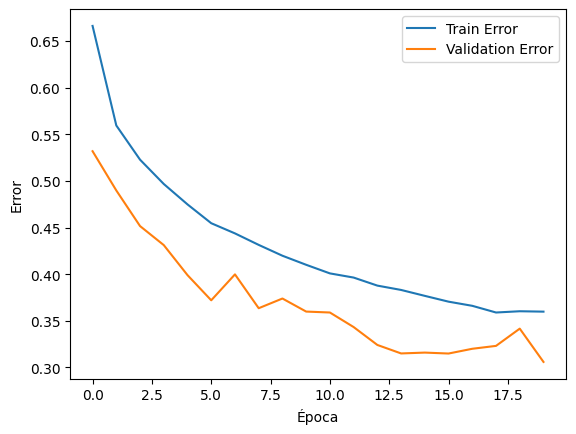

In [ ]:
# Agrego una capa de Data Augmentation al modelo anterior, con el dropuot óptimo
# encontrado
model = modelo('3', best_p)
history = model.fit(train_images, train_labels, epochs = 20,
                    validation_data = (val_images, val_labels))

# Resto 1 a los valores de accuracy para obtener los errores de entrenamiento y
# de validación
e_train = np.subtract(1, history.history['accuracy'])
e_val = np.subtract(1, history.history['val_accuracy'])

# Grafico
plt.plot(e_train, label = 'Train Error')
plt.plot(e_val, label = 'Validation Error')
plt.xlabel('Época')
plt.ylabel('Error')
plt.legend(loc = 'upper right')

# Resto 1 al valor de accuracy para obtener el error de test, y lo imprimo
_, test_acc = model.evaluate(test_images,  test_labels, verbose = 2)
e_test = 1 - test_acc

print('Test Error: ' + str(e_test))

Al agregar la capa de Data Augmentation ya no se observa sobreajuste. Pero, como desventaja, en este caso el error de test resultó un poco mayor a los que se obtuvieron en el ejercicio anterior.

Respecto al error de validación, resultó muy similar a los valores del ejercicio anterior.